# Kaggle Loan Defaulter Problemset

#### Here we will use Nvidia rapids libraries cuml, cudf to use grphics card instead CPU
#### Let's import all the libraries required

In [1]:
import cudf
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

%matplotlib inline

#### Reading csv file to dataframe using cudf

In [2]:
dataset = cudf.read_csv('./Loan_Default.csv')
dataset.head(5)

,ID,year,loan_limit,Gender,approv_in_adv,loan_type,loan_purpose,Credit_Worthiness,open_credit,business_or_commercial,...,credit_type,Credit_Score,co-applicant_credit_type,age,submission_of_application,LTV,Region,Security_Type,Status,dtir1
0,24890,2019,cf,Sex Not Available,nopre,type1,p1,l1,nopc,nob/c,...,EXP,758,CIB,25-34,to_inst,98.72881356,south,direct,1,45.0
1,24891,2019,cf,Male,nopre,type2,p1,l1,nopc,b/c,...,EQUI,552,EXP,55-64,to_inst,<NA>,North,direct,1,<NA>
2,24892,2019,cf,Male,pre,type1,p1,l1,nopc,nob/c,...,EXP,834,CIB,35-44,to_inst,80.01968504,south,direct,0,46.0
3,24893,2019,cf,Male,nopre,type1,p4,l1,nopc,nob/c,...,EXP,587,CIB,45-54,not_inst,69.3768997,North,direct,0,42.0
4,24894,2019,cf,Joint,pre,type1,p1,l1,nopc,nob/c,...,CRIF,602,EXP,25-34,not_inst,91.88654354,North,direct,0,39.0


### There are 34 feature vectors in this dataset and DataFrame is not displaying all of them. To solve this we can set number of columns we want to display with pandas settings as shown in the cell below:


In [3]:
pd.set_option("display.max_columns", dataset.shape[-1]) 
dataset.head(5)

,ID,year,loan_limit,Gender,approv_in_adv,loan_type,loan_purpose,Credit_Worthiness,open_credit,business_or_commercial,loan_amount,rate_of_interest,Interest_rate_spread,Upfront_charges,term,Neg_ammortization,interest_only,lump_sum_payment,property_value,construction_type,occupancy_type,Secured_by,total_units,income,credit_type,Credit_Score,co-applicant_credit_type,age,submission_of_application,LTV,Region,Security_Type,Status,dtir1
0,24890,2019,cf,Sex Not Available,nopre,type1,p1,l1,nopc,nob/c,116500,<NA>,<NA>,<NA>,360.0,not_neg,not_int,not_lpsm,118000.0,sb,pr,home,1U,1740.0,EXP,758,CIB,25-34,to_inst,98.72881356,south,direct,1,45.0
1,24891,2019,cf,Male,nopre,type2,p1,l1,nopc,b/c,206500,<NA>,<NA>,<NA>,360.0,not_neg,not_int,lpsm,<NA>,sb,pr,home,1U,4980.0,EQUI,552,EXP,55-64,to_inst,<NA>,North,direct,1,<NA>
2,24892,2019,cf,Male,pre,type1,p1,l1,nopc,nob/c,406500,4.56,0.2,595.0,360.0,neg_amm,not_int,not_lpsm,508000.0,sb,pr,home,1U,9480.0,EXP,834,CIB,35-44,to_inst,80.01968504,south,direct,0,46.0
3,24893,2019,cf,Male,nopre,type1,p4,l1,nopc,nob/c,456500,4.25,0.681,<NA>,360.0,not_neg,not_int,not_lpsm,658000.0,sb,pr,home,1U,11880.0,EXP,587,CIB,45-54,not_inst,69.3768997,North,direct,0,42.0
4,24894,2019,cf,Joint,pre,type1,p1,l1,nopc,nob/c,696500,4.0,0.3042,0.0,360.0,not_neg,not_int,not_lpsm,758000.0,sb,pr,home,1U,10440.0,CRIF,602,EXP,25-34,not_inst,91.88654354,North,direct,0,39.0


### Feature vector ID is not useful, we can just drop it and if we have data of only year then it's not a timeseries problem, we can drop that as well. Let's check how many unique values we have in the year feature vector

In [4]:
dataset['year'].unique()

0    2019
Name: year, dtype: int64

### This data is only for the year 2019, it's same for all the vector this we can drop this as well.
### In the cell below we will drop ID, and year feature vector

In [5]:
# axis=1 = columns and 0 = rows
dataset.drop(['ID', 'year'], axis=1, inplace=True)
dataset.head(5)

,loan_limit,Gender,approv_in_adv,loan_type,loan_purpose,Credit_Worthiness,open_credit,business_or_commercial,loan_amount,rate_of_interest,Interest_rate_spread,Upfront_charges,term,Neg_ammortization,interest_only,lump_sum_payment,property_value,construction_type,occupancy_type,Secured_by,total_units,income,credit_type,Credit_Score,co-applicant_credit_type,age,submission_of_application,LTV,Region,Security_Type,Status,dtir1
0,cf,Sex Not Available,nopre,type1,p1,l1,nopc,nob/c,116500,<NA>,<NA>,<NA>,360.0,not_neg,not_int,not_lpsm,118000.0,sb,pr,home,1U,1740.0,EXP,758,CIB,25-34,to_inst,98.72881356,south,direct,1,45.0
1,cf,Male,nopre,type2,p1,l1,nopc,b/c,206500,<NA>,<NA>,<NA>,360.0,not_neg,not_int,lpsm,<NA>,sb,pr,home,1U,4980.0,EQUI,552,EXP,55-64,to_inst,<NA>,North,direct,1,<NA>
2,cf,Male,pre,type1,p1,l1,nopc,nob/c,406500,4.56,0.2,595.0,360.0,neg_amm,not_int,not_lpsm,508000.0,sb,pr,home,1U,9480.0,EXP,834,CIB,35-44,to_inst,80.01968504,south,direct,0,46.0
3,cf,Male,nopre,type1,p4,l1,nopc,nob/c,456500,4.25,0.681,<NA>,360.0,not_neg,not_int,not_lpsm,658000.0,sb,pr,home,1U,11880.0,EXP,587,CIB,45-54,not_inst,69.3768997,North,direct,0,42.0
4,cf,Joint,pre,type1,p1,l1,nopc,nob/c,696500,4.0,0.3042,0.0,360.0,not_neg,not_int,not_lpsm,758000.0,sb,pr,home,1U,10440.0,CRIF,602,EXP,25-34,not_inst,91.88654354,North,direct,0,39.0


### We want to be sure that our dataset is not biased and we have enough number of records for all categories in our dataset.

### In the cell below we'll plot the barplot to check the same.

This dataset has features: 32
Total number of samples in the dataset rows: 148670


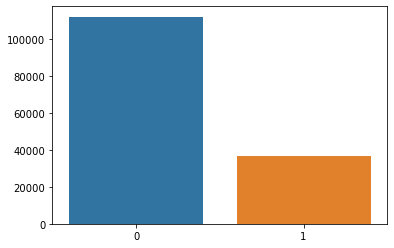

In [6]:
n_rows, n_features = dataset.shape
print (f"This dataset has features: {n_features}")
print (f"Total number of samples in the dataset rows: {n_rows}")

# We also need to make sure that we have enough data to test all the categories
# Status is our dependent feature
dist = dataset.groupby(by="Status").size()

_ = sns.barplot(x=dist.index.values_host, y=dist.values.get())

### Observations:
1. The dataset has lot of values for class 0 and compared to that very few values for the class 1. But this should be enough for training the model. But,
2. While splitting the dataset to train and test, we need to make sure that we have enough number of class 1 samples in the test array.

## Checking the null values in the dataset

In [7]:
null_cols_status_0 = dataset[dataset["Status"] == 0].isnull().sum() # we can also use isnull method both are same
null_cols_status_1 = dataset[dataset["Status"] == 1].isnull().sum() # we can also use isnull method both are same

print (f"Maximum number of null values for the class 0: {np.max(null_cols_status_0)}")
print (f"Maximum number of null values for the class 1: {np.max(null_cols_status_1)}")

Maximum number of null values for the class 0: 7911
Maximum number of null values for the class 1: 36639


## Observations:
1. For the class 0 we have 7,911 null values, if we dropped all of these it would be fine because we still will have enough number of samples to train the model. But,
2. For the class 1 we maybe have just enough data to train our model and we can't just drop all the 36,639 rows.
3. We need to replace the null values with some statistically appropriate data for all the feture vector with null values in them.

### In the following cell we will get the all the feature names which has null values.

In [8]:
temp0 = set(null_cols_status_0.index[null_cols_status_0 > 0].values_host)
temp1 = set(null_cols_status_0.index[null_cols_status_1 > 0].values_host)

cols_with_na_values = list(temp0.union(temp1))
del temp0, temp1

cols_with_na_values

['Upfront_charges',
 'dtir1',
 'income',
 'property_value',
 'approv_in_adv',
 'LTV',
 'Neg_ammortization',
 'rate_of_interest',
 'age',
 'loan_limit',
 'Interest_rate_spread',
 'submission_of_application',
 'term',
 'loan_purpose']

## Before performing any statistical operatings we need to see that all the features are stored in the DataFrame with appropriate datatypes

In [9]:
dataset.info()

<class 'cudf.core.dataframe.DataFrame'>
RangeIndex: 148670 entries, 0 to 148669
Data columns (total 32 columns):
 #   Column                     Non-Null Count   Dtype
---  ------                     --------------   -----
 0   loan_limit                 145326 non-null  object
 1   Gender                     148670 non-null  object
 2   approv_in_adv              147762 non-null  object
 3   loan_type                  148670 non-null  object
 4   loan_purpose               148536 non-null  object
 5   Credit_Worthiness          148670 non-null  object
 6   open_credit                148670 non-null  object
 7   business_or_commercial     148670 non-null  object
 8   loan_amount                148670 non-null  int64
 9   rate_of_interest           112231 non-null  float64
 10  Interest_rate_spread       112031 non-null  float64
 11  Upfront_charges            109028 non-null  float64
 12  term                       148629 non-null  float64
 13  Neg_ammortization          148549 non-nul

### Obervations:
1. As you can see lots of features are stored with obeject datatype, in this case it is not necessary that all of them are having string values but some integer or float values may be are stored as string in the dataframe.

## Let's check what kind of values all the feature vectors have.

In [10]:
for column in dataset.columns:
    print (dataset.loc[:, column].unique())

0    <NA>
1      cf
2     ncf
Name: loan_limit, dtype: object
0               Female
1                Joint
2                 Male
3    Sex Not Available
Name: Gender, dtype: object
0     <NA>
1    nopre
2      pre
Name: approv_in_adv, dtype: object
0    type1
1    type2
2    type3
Name: loan_type, dtype: object
0    <NA>
1      p1
2      p2
3      p3
4      p4
Name: loan_purpose, dtype: object
0    l1
1    l2
Name: Credit_Worthiness, dtype: object
0    nopc
1     opc
Name: open_credit, dtype: object
0      b/c
1    nob/c
Name: business_or_commercial, dtype: object
0        16500
1        26500
2        36500
3        46500
4        56500
        ...   
206    2926500
207    2986500
208    3006500
209    3346500
210    3576500
Name: loan_amount, Length: 211, dtype: int64
0       <NA>
1        0.0
2      2.125
3       2.25
4      2.375
       ...  
127    7.125
128    7.375
129      7.5
130     7.75
131      8.0
Name: rate_of_interest, Length: 132, dtype: float64
0           <NA>
1     

## Observations:
1. There are lot of feature vectors with string categorical data, we need to convert those to integer data i.e. assigning a number to each category.
2. Once categorical features are encoded then we can change datatype of that feature to integer.

### We have lots of 34 features in this dataset checking for categorical feature vectors can take time.
### We will automate this in the following manner:
1. We can try to find columns which has categorical values with based on how many number of unique values that feature has. <br/>
For Ex: ```loan_limit``` feature is a categoriacal vector and has <b>2 unique</b> categories <b>cf</b> and <b>ncf</b>.
2. Like the example above we can for all the categorical feature vectors, if a vector has < x number of unique values then we can categorize it as categorical feature.
3. Here in the following cell we have ```n_unique_values``` variable which we will set to <b>10</b>. Which means if any vector has < 10 unique values then it's categorical variable.

In [11]:
n_unique_values = 10
all_columns = dataset.columns.to_list()
categorical_columns = []

for i, column in enumerate(all_columns):
    temp = dataset.loc[:, column].unique().to_arrow().to_pylist()
    if len(temp) < n_unique_values:
        print (f"{i+1}. {column} has {len(temp)} unique values, which are {temp}") 
        categorical_columns.append(column)
del temp

1. loan_limit has 3 unique values, which are [None, 'cf', 'ncf']
2. Gender has 4 unique values, which are ['Female', 'Joint', 'Male', 'Sex Not Available']
3. approv_in_adv has 3 unique values, which are [None, 'nopre', 'pre']
4. loan_type has 3 unique values, which are ['type1', 'type2', 'type3']
5. loan_purpose has 5 unique values, which are [None, 'p1', 'p2', 'p3', 'p4']
6. Credit_Worthiness has 2 unique values, which are ['l1', 'l2']
7. open_credit has 2 unique values, which are ['nopc', 'opc']
8. business_or_commercial has 2 unique values, which are ['b/c', 'nob/c']
14. Neg_ammortization has 3 unique values, which are [None, 'neg_amm', 'not_neg']
15. interest_only has 2 unique values, which are ['int_only', 'not_int']
16. lump_sum_payment has 2 unique values, which are ['lpsm', 'not_lpsm']
18. construction_type has 2 unique values, which are ['mh', 'sb']
19. occupancy_type has 3 unique values, which are ['ir', 'pr', 'sr']
20. Secured_by has 2 unique values, which are ['home', 'land

## Observations:
1. We will encode these categorical values before we fix the NA values, but encoder may end up assigning a category to NA values. We need to make sure that it does not happen.
2. Feature vector ```Gender``` has a value ```Sex Not Available``` which are essentially NA values.
3. Ignore status while performing encode.

### Replacing ```Sex Not Available``` with ```np.nan``` in feature vector ```Gender```.

In [12]:
dataset["Gender"] = dataset["Gender"].replace("Sex Not Available", np.nan)

### Updating ```cols_with_na_values``` adding ```Gender``` to it

In [13]:
if "Gender" not in cols_with_na_values:
    cols_with_na_values.append("Gender")
    print (cols_with_na_values)

['Upfront_charges', 'dtir1', 'income', 'property_value', 'approv_in_adv', 'LTV', 'Neg_ammortization', 'rate_of_interest', 'age', 'loan_limit', 'Interest_rate_spread', 'submission_of_application', 'term', 'loan_purpose', 'Gender']


## Encoding categorical features

In [14]:
na_before = dataset[categorical_columns].isnull().sum()

In [15]:
from cuml.preprocessing import LabelEncoder

In [16]:
le = LabelEncoder(verbose=True)
for column in categorical_columns:
    # Retriving not null data for each feature vector 
    temp = dataset.loc[ dataset[column].notnull(), column ] 
    # Replacing the same not null data with an integer for each category in each column
    dataset.loc[ dataset[column].notnull(), [column,] ] = le.fit_transform(temp)
    
del le, temp
dataset[categorical_columns].head(5)

,loan_limit,Gender,approv_in_adv,loan_type,loan_purpose,Credit_Worthiness,open_credit,business_or_commercial,Neg_ammortization,interest_only,lump_sum_payment,construction_type,occupancy_type,Secured_by,total_units,credit_type,co-applicant_credit_type,age,submission_of_application,Region,Security_Type,Status
0,0,<NA>,0,0,0,0,0,1,1,1,1,1,1,0,0,3,0,0,1,3,1,1
1,0,2,0,1,0,0,0,0,1,1,0,1,1,0,0,2,1,3,1,0,1,1
2,0,2,1,0,0,0,0,1,0,1,1,1,1,0,0,3,0,1,1,3,1,0
3,0,2,0,0,3,0,0,1,1,1,1,1,1,0,0,3,0,2,0,0,1,0
4,0,1,1,0,0,0,0,1,1,1,1,1,1,0,0,1,1,0,0,0,1,0


All the categorical data has been transformed to integer categories and as we can see ```Gender``` vector has ```<NA>``` value as well. Just to be sure we can check that all the categorical fearures still has the ```<NA>``` values and those are not replaced with a category in any feature vector.

In [17]:
na_after = dataset[categorical_columns].isnull().sum()

In [18]:
na_before == na_after

loan_limit                   True
Gender                       True
approv_in_adv                True
loan_type                    True
loan_purpose                 True
Credit_Worthiness            True
open_credit                  True
business_or_commercial       True
Neg_ammortization            True
interest_only                True
lump_sum_payment             True
construction_type            True
occupancy_type               True
Secured_by                   True
total_units                  True
credit_type                  True
co-applicant_credit_type     True
age                          True
submission_of_application    True
Region                       True
Security_Type                True
Status                       True
dtype: bool

We still have the same number of ```<NA>``` values in all feature vectors 

In [19]:
dataset.info()

<class 'cudf.core.dataframe.DataFrame'>
RangeIndex: 148670 entries, 0 to 148669
Data columns (total 32 columns):
 #   Column                     Non-Null Count   Dtype
---  ------                     --------------   -----
 0   loan_limit                 145326 non-null  object
 1   Gender                     111011 non-null  object
 2   approv_in_adv              147762 non-null  object
 3   loan_type                  148670 non-null  object
 4   loan_purpose               148536 non-null  object
 5   Credit_Worthiness          148670 non-null  object
 6   open_credit                148670 non-null  object
 7   business_or_commercial     148670 non-null  object
 8   loan_amount                148670 non-null  int64
 9   rate_of_interest           112231 non-null  float64
 10  Interest_rate_spread       112031 non-null  float64
 11  Upfront_charges            109028 non-null  float64
 12  term                       148629 non-null  float64
 13  Neg_ammortization          148549 non-nul

## Feature scaling

Continuous feature vectors can range between very nigh to very low values, thus not following gaussian distribution and this can affect our model in significant way.

We need perform feature scaling to convert feature vectors to standard normal distribution.

### But first we need to find what are the continuous feature vectors in our dataset.

In [20]:
continuous_columns = list(set(dataset.columns.values.tolist()) - set(categorical_columns))

In [21]:
print (f"In our dataset we have {len(continuous_columns)} continuous feature vectors.")

In our dataset we have 10 continuous feature vectors.


In [22]:
dataset[continuous_columns].head(5)

,loan_amount,rate_of_interest,Upfront_charges,dtir1,income,property_value,Interest_rate_spread,Credit_Score,term,LTV
0,116500,<NA>,<NA>,45.0,1740.0,118000.0,<NA>,758,360.0,98.72881356
1,206500,<NA>,<NA>,<NA>,4980.0,<NA>,<NA>,552,360.0,<NA>
2,406500,4.56,595.0,46.0,9480.0,508000.0,0.2,834,360.0,80.01968504
3,456500,4.25,<NA>,42.0,11880.0,658000.0,0.681,587,360.0,69.3768997
4,696500,4.0,0.0,39.0,10440.0,758000.0,0.3042,602,360.0,91.88654354


### Checking the range of values in these feature vectors

In [23]:
for column in dataset[continuous_columns].columns:
    min_ = int(dataset[column].min())
    max_ = int(dataset[column].max())
    print (f"Feature {column} ranges between {min_} and {max_}")

Feature loan_amount ranges between 16500 and 3576500
Feature rate_of_interest ranges between 0 and 8
Feature Upfront_charges ranges between 0 and 60000
Feature dtir1 ranges between 5 and 61
Feature income ranges between 0 and 578580
Feature property_value ranges between 8000 and 16508000
Feature Interest_rate_spread ranges between -3 and 3
Feature Credit_Score ranges between 500 and 900
Feature term ranges between 96 and 360
Feature LTV ranges between 0 and 7831


## Observations:
1. Feature ```Interest_rate_spread``` and ```rate_of_interest``` does not need to be scaled

In [24]:
scale_columns = ["loan_amount", "income", "dtir1", "Credit_Score", "term", "property_value", "LTV", 
                 "Upfront_charges"]

In [25]:
from cuml.preprocessing import StandardScaler

In [26]:
scaler = StandardScaler(with_mean=True, with_std=True)

if len(scale_columns) > 1:
    dataset[scale_columns] = scaler.fit_transform(dataset[scale_columns])
elif len(scale_columns) == 1:
    dataset[column] = scaler.fit_transform(dataset[column].values.reshape(-1,1))

del scaler
dataset.head(5)

,loan_limit,Gender,approv_in_adv,loan_type,loan_purpose,Credit_Worthiness,open_credit,business_or_commercial,loan_amount,rate_of_interest,Interest_rate_spread,Upfront_charges,term,Neg_ammortization,interest_only,lump_sum_payment,property_value,construction_type,occupancy_type,Secured_by,total_units,income,credit_type,Credit_Score,co-applicant_credit_type,age,submission_of_application,LTV,Region,Security_Type,Status,dtir1
0,0,<NA>,0,0,0,0,0,1,-1.166980,<NA>,<NA>,NaN,0.425679,1,1,1,-1.055453,1,1,0,0,-0.803092,3,0.502357,0,0,1,0.650088,3,1,1,0.689123
1,0,2,0,1,0,0,0,0,-0.677607,<NA>,<NA>,NaN,0.425679,1,1,0,NaN,1,1,0,0,-0.304367,2,-1.275413,1,3,1,NaN,0,1,1,NaN
2,0,2,1,0,0,0,0,1,0.409890,4.56,0.2,-0.808954,0.425679,0,1,1,0.028079,1,1,0,0,0.388307,3,1.158234,0,1,1,0.181979,3,1,0,0.783951
3,0,2,0,0,3,0,0,1,0.681764,4.25,0.681,NaN,0.425679,1,1,1,0.444822,1,1,0,0,0.757733,3,-0.973365,0,2,0,-0.084308,0,1,0,0.404638
4,0,1,1,0,0,0,0,1,1.986759,4.0,0.3042,-0.991969,0.425679,1,1,1,0.722651,1,1,0,0,0.536077,1,-0.843916,1,0,0,0.478892,0,1,0,0.120154


### We have all the values in the integer or float form.
### Now, let's change the datatype of each column with object datatype to int or float as required.

In [27]:
# For the each column in the dataset
for column in dataset.columns:
    i = 0
    column = str(column)
    # Checking if datatype of the feature ```column``` is object
    if dataset[column].dtype == 'object' or dataset[column].dtype == np.float64:
        # Running a loop until we get non-NA type value for feature ```column```
        while True:
            # Getting the ith value from ```column``` feature
            temp = dataset.loc[i, column]
            i += 1
            # Checking if the values is of type NA
            if type(temp) != pd._libs.missing.NAType:
                print ("*"*50)
                print (type(temp))
                print ("*"*50)
                isFloat = False
                # Trying to convert the value to float 
                try:
                    float(temp)
                    isFloat = True
                except:
                    isFloat = False
                # Checking if the type of data is string if yes, checking if it's numberic
                # In case of float value ```isnumeric()``` will return ```False```
                if type(temp) == str and temp.isnumeric():
                    # Converting the datatype of the feature ```column``` to integer
                    print (f"Coverting feature {column} type from {dataset[column].dtype} to int")
                    dataset[column] = dataset[column].astype(int, copy=False)
                elif isFloat or type(temp) == float:
                    # Converting the datatype of the feature ```column``` to np.float32
                    print (f"Coverting feature {column} type from {dataset[column].dtype} to np.float32")
                    dataset[column] = dataset[column].astype(np.float32, copy=False)
                else:
                    # In case type of value is neither integer or float feature ```column``` type as it is
                    print (f"Leaving {column} as it is {dataset[column].dtype}")
                break

**************************************************
<class 'str'>
**************************************************
Coverting feature loan_limit type from object to int
**************************************************
<class 'str'>
**************************************************
Coverting feature Gender type from object to int
**************************************************
<class 'str'>
**************************************************
Coverting feature approv_in_adv type from object to int
**************************************************
<class 'str'>
**************************************************
Coverting feature loan_type type from object to int
**************************************************
<class 'str'>
**************************************************
Coverting feature loan_purpose type from object to int
**************************************************
<class 'str'>
**************************************************
Coverting feature Credit_Worthiness typ

In [28]:
dataset.head(5)

,loan_limit,Gender,approv_in_adv,loan_type,loan_purpose,Credit_Worthiness,open_credit,business_or_commercial,loan_amount,rate_of_interest,Interest_rate_spread,Upfront_charges,term,Neg_ammortization,interest_only,lump_sum_payment,property_value,construction_type,occupancy_type,Secured_by,total_units,income,credit_type,Credit_Score,co-applicant_credit_type,age,submission_of_application,LTV,Region,Security_Type,Status,dtir1
0,0,<NA>,0,0,0,0,0,1,-1.166980,<NA>,<NA>,NaN,0.425679,1,1,1,-1.055453,1,1,0,0,-0.803092,3,0.502357,0,0,1,0.650088,3,1,1,0.689122
1,0,2,0,1,0,0,0,0,-0.677607,<NA>,<NA>,NaN,0.425679,1,1,0,NaN,1,1,0,0,-0.304367,2,-1.275413,1,3,1,NaN,0,1,1,NaN
2,0,2,1,0,0,0,0,1,0.409890,4.559999943,0.200000003,-0.808954,0.425679,0,1,1,0.028079,1,1,0,0,0.388307,3,1.158234,0,1,1,0.181979,3,1,0,0.783951
3,0,2,0,0,3,0,0,1,0.681764,4.25,0.680999994,NaN,0.425679,1,1,1,0.444822,1,1,0,0,0.757733,3,-0.973365,0,2,0,-0.084308,0,1,0,0.404638
4,0,1,1,0,0,0,0,1,1.986759,4.0,0.304199994,-0.991969,0.425679,1,1,1,0.722651,1,1,0,0,0.536077,1,-0.843916,1,0,0,0.478892,0,1,0,0.120154


In [29]:
dataset.info()

<class 'cudf.core.dataframe.DataFrame'>
RangeIndex: 148670 entries, 0 to 148669
Data columns (total 32 columns):
 #   Column                     Non-Null Count   Dtype
---  ------                     --------------   -----
 0   loan_limit                 145326 non-null  int64
 1   Gender                     111011 non-null  int64
 2   approv_in_adv              147762 non-null  int64
 3   loan_type                  148670 non-null  int64
 4   loan_purpose               148536 non-null  int64
 5   Credit_Worthiness          148670 non-null  int64
 6   open_credit                148670 non-null  int64
 7   business_or_commercial     148670 non-null  int64
 8   loan_amount                148670 non-null  float32
 9   rate_of_interest           112231 non-null  float32
 10  Interest_rate_spread       112031 non-null  float32
 11  Upfront_charges            148670 non-null  float32
 12  term                       148670 non-null  float32
 13  Neg_ammortization          148549 non-null  int

### Now that we have the correct datatype for all the feature vectors we can check the relation among all the feature vectors

In [30]:
corr_map = dataset.to_pandas().corr()

<AxesSubplot:>

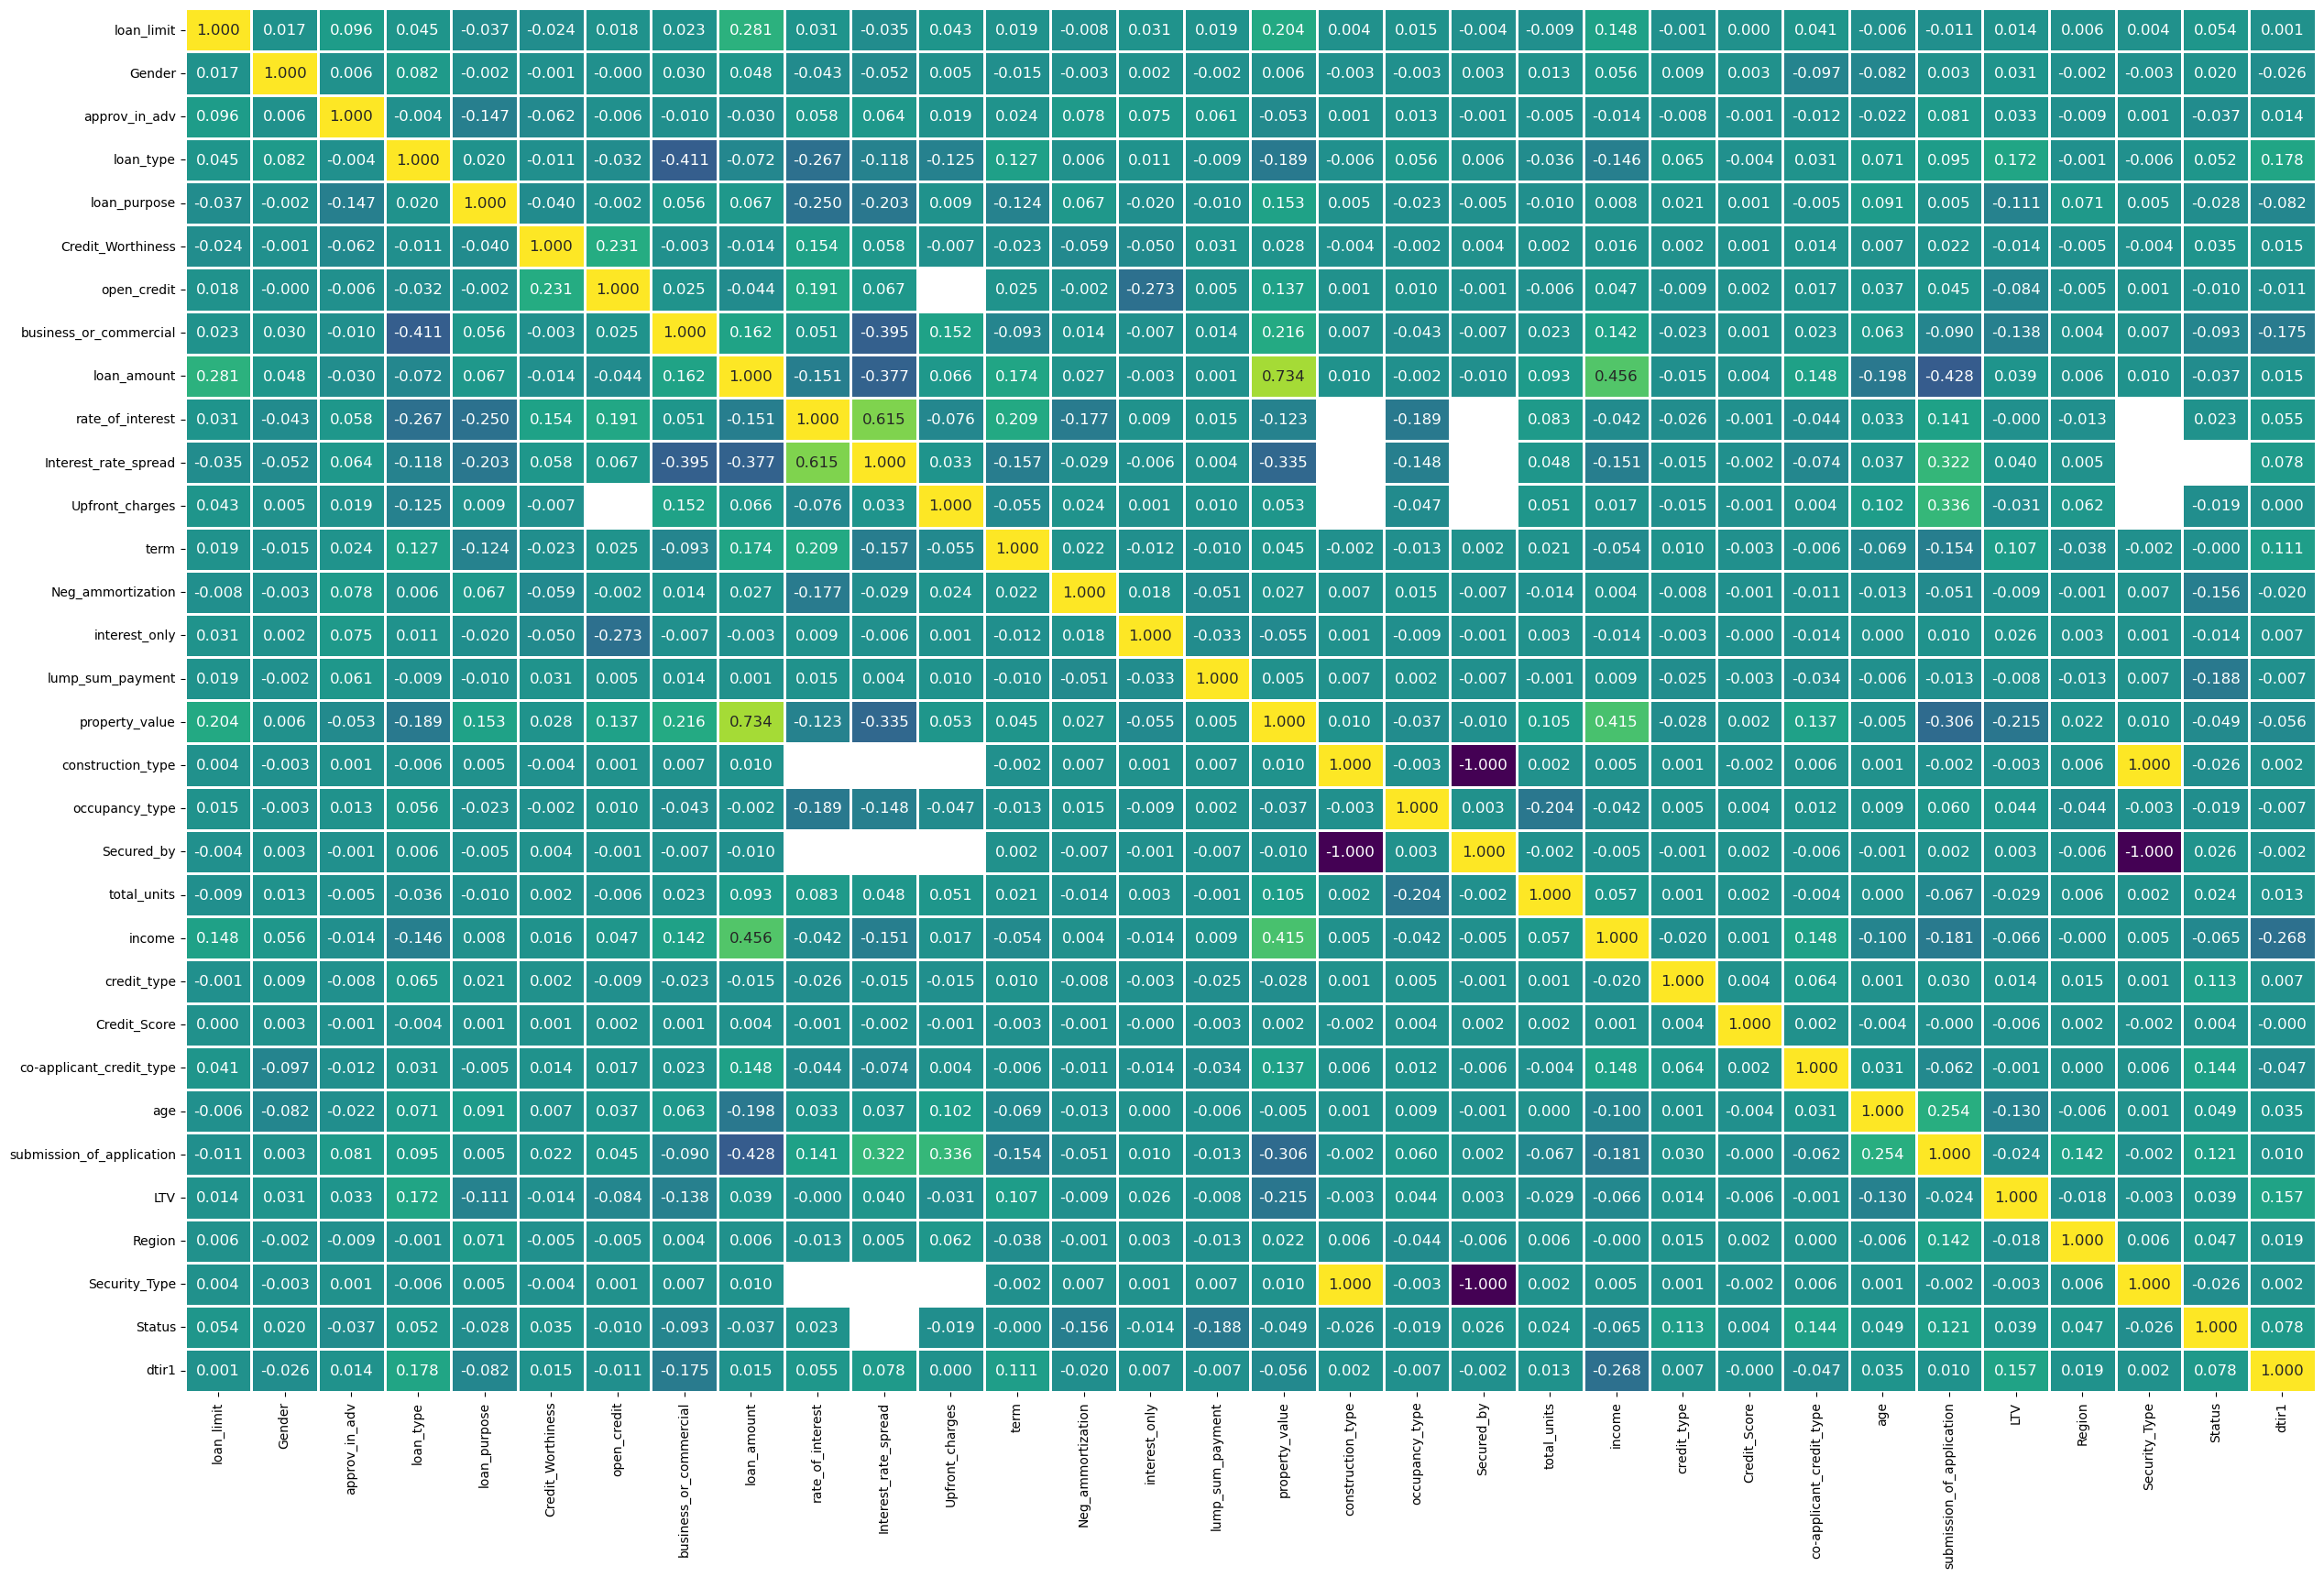

In [31]:
plt.figure(figsize=(30, 20), dpi=100) 
sns.heatmap(corr_map, annot=True, annot_kws={"fontsize":12}, linecolor='white', \
            linewidth=1, fmt='.3f', cmap="viridis", cbar=False)

## Understanding relationship score
<pre>
Correlation value ranging > 0.7 and 1.0, is highly positive/negetive relationship score,
       value > 0.5 and value <= 0.7, is moderate positive/negetive relationship score,
       value > 0.0 and value <= 0.5, is low positive/negetive relationship score, and
       value == 0.0, is no relationship at all.
</pre>

### This big heatmap can be difficult to read, run the cell below to to create a dictionary and categorise low, moderate and high correlation which another feature.
### The code below checks only for one feature's relation with another one feature, there is a possibility that a feature vector may be multicoliniarity please check the heatmap for that.

In [32]:
corr_label = np.array(["high", "moderate", "low", "no"])
pos_neg_corr_label = np.array(["positive", "negative"])

correlations = {}
for column in cols_with_na_values:
    dict_ = corr_map[column].drop(labels=column).to_dict()
    values = list(dict_.values())
    keys = list(dict_.keys())
    value = max( [abs(min(values)), abs(max(values))] )
    relation = ([
        value > 0.7 and value <= 1.0, 
        value > 0.5 and value <= 0.7,
        value > 0.0 and value <= 0.5, 
        value == 0.0,
    ]) 
    try:
        key = keys[values.index(value)]
    except ValueError:
        value *= -1
        key = keys[values.index(value)]    
    cor_label = corr_label[relation][0]
    if cor_label in correlations.keys():
        temp = correlations.get(cor_label)
        temp[column] = [value, key]
        correlations[cor_label].update(temp)
    else:
        correlations[cor_label] = {column: [value, key]}
    print (f"{column} has {corr_label[relation][0]} {pos_neg_corr_label[[value >= 0, value < 0]][0]} " +\
    f"correlation with {key} as {value:.2f}")

Upfront_charges has low positive correlation with submission_of_application as 0.34
dtir1 has low negative correlation with income as -0.27
income has low positive correlation with loan_amount as 0.46
property_value has high positive correlation with loan_amount as 0.73
approv_in_adv has low negative correlation with loan_purpose as -0.15
LTV has low negative correlation with property_value as -0.22
Neg_ammortization has low negative correlation with rate_of_interest as -0.18
rate_of_interest has moderate positive correlation with Interest_rate_spread as 0.61
age has low positive correlation with submission_of_application as 0.25
loan_limit has low positive correlation with loan_amount as 0.28
Interest_rate_spread has moderate positive correlation with rate_of_interest as 0.61
submission_of_application has low negative correlation with loan_amount as -0.43
term has low positive correlation with rate_of_interest as 0.21
loan_purpose has low negative correlation with rate_of_interest as 

In [33]:
correlations

{'low': {'Upfront_charges': [0.3358230833109225, 'submission_of_application'],
  'dtir1': [-0.26780661087151497, 'income'],
  'income': [0.45606544773956276, 'loan_amount'],
  'approv_in_adv': [-0.14706742459037656, 'loan_purpose'],
  'LTV': [-0.2151017387028855, 'property_value'],
  'Neg_ammortization': [-0.17665774226592168, 'rate_of_interest'],
  'age': [0.25366332102894346, 'submission_of_application'],
  'loan_limit': [0.2810161948669721, 'loan_amount'],
  'submission_of_application': [-0.4284981764371403, 'loan_amount'],
  'term': [0.20933032642802735, 'rate_of_interest'],
  'loan_purpose': [-0.25017695163739245, 'rate_of_interest'],
  'Gender': [-0.0972018736301115, 'co-applicant_credit_type']},
 'high': {'property_value': [0.7342490173003003, 'loan_amount']},
 'moderate': {'rate_of_interest': [0.6149080846899242, 'Interest_rate_spread'],
  'Interest_rate_spread': [0.6149080846899242, 'rate_of_interest']}}

### Given that we have significant relationship with another feature column and all the NaN values of feature X are present in feature vector y, we can make a model to predict missing values
For Ex: Finding the total missing values in the feature vector ```DTIR1``` is ```24121``` and ```DTIR1``` feature has ```-0.27``` relation with feature vector ```INCOME```, out of those ```24121``` missing values in ```DTIR1```, ```15081``` are present in ```INCOME``` feature vector and ```9040``` are null.

In [34]:
for cor in correlations.keys():
    print ('\n', '-'*10, 'Correlation:', cor.upper(), '-'*10, '\n')
    for sub in correlations.get(cor):
        temp = correlations.get(cor).get(sub)
        temp_data = dataset[[sub,temp[1]]]
        final = temp_data[ temp_data[sub].isnull() ][temp[1]].isnull().sum()
        print (f"{sub.upper()} vs. {temp[1].upper()}: Corr: {temp[0]:.2f}")
        print (f"Out of {temp_data[sub].isnull().sum()} nan values in feature {sub.upper()}, " +\
               f"{temp_data[sub].isnull().sum()-final} in {temp[1].upper()} are present and {final} are absent\n")
del temp, temp_data, final


 ---------- Correlation: LOW ---------- 

UPFRONT_CHARGES vs. SUBMISSION_OF_APPLICATION: Corr: 0.34
Out of 39642 nan values in feature UPFRONT_CHARGES, 39595 in SUBMISSION_OF_APPLICATION are present and 47 are absent

DTIR1 vs. INCOME: Corr: -0.27
Out of 24121 nan values in feature DTIR1, 15081 in INCOME are present and 9040 are absent

INCOME vs. LOAN_AMOUNT: Corr: 0.46
Out of 9150 nan values in feature INCOME, 9150 in LOAN_AMOUNT are present and 0 are absent

APPROV_IN_ADV vs. LOAN_PURPOSE: Corr: -0.15
Out of 908 nan values in feature APPROV_IN_ADV, 908 in LOAN_PURPOSE are present and 0 are absent

LTV vs. PROPERTY_VALUE: Corr: -0.22
Out of 15098 nan values in feature LTV, 0 in PROPERTY_VALUE are present and 15098 are absent

NEG_AMMORTIZATION vs. RATE_OF_INTEREST: Corr: -0.18
Out of 121 nan values in feature NEG_AMMORTIZATION, 89 in RATE_OF_INTEREST are present and 32 are absent

AGE vs. SUBMISSION_OF_APPLICATION: Corr: 0.25
Out of 200 nan values in feature AGE, 0 in SUBMISSION_OF_

### As we can see that feature vector ```PROPERTY_VALUE``` is linearaly related with feature vector ```LOAN_AMOUNT``` and all the values which are null in ```PROPERTY_VALUE``` are present in feature vector ```LOAN_AMOUNT```

Let's try plotting the data to see how it looks

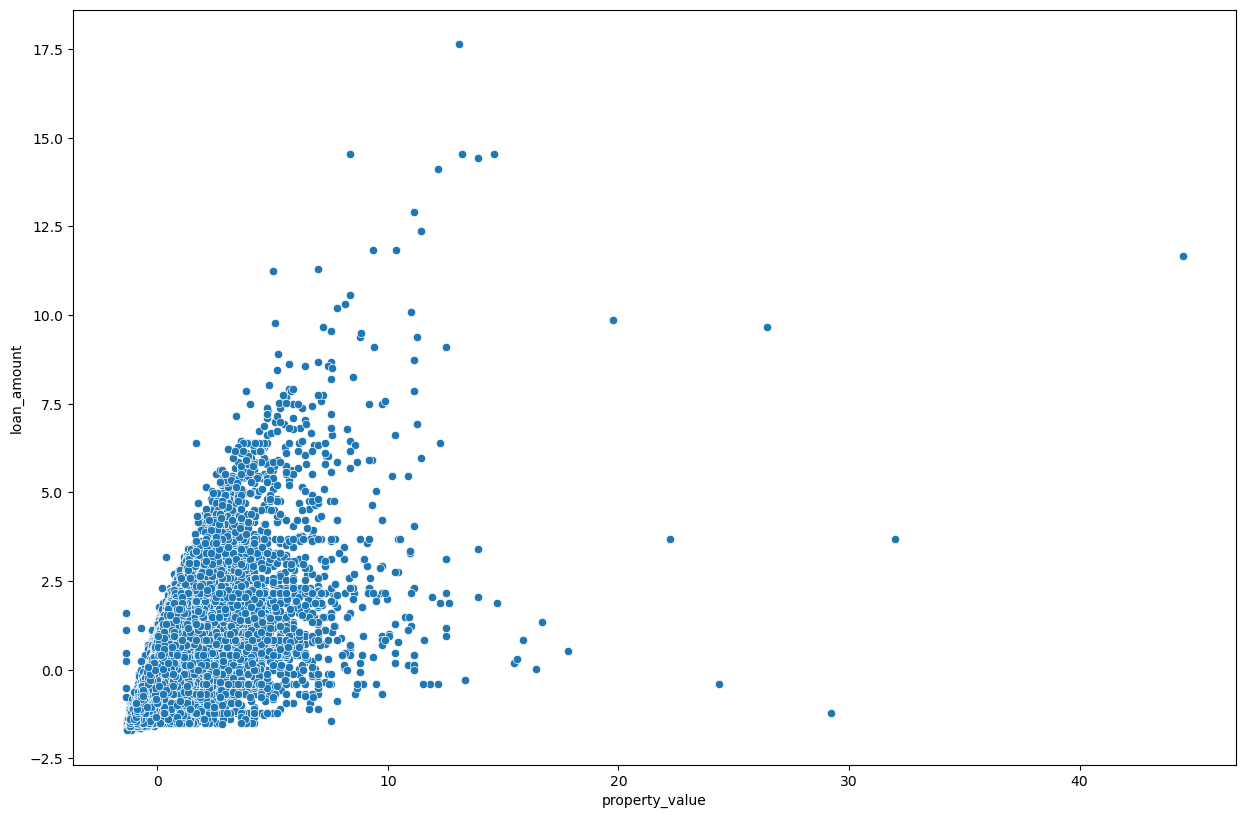

In [35]:
plt.figure(figsize=(15, 10), dpi=100)
_ = sns.scatterplot(x="property_value", y="loan_amount", data=dataset[["property_value", "loan_amount"]].to_pandas())

### We can see in the graph that LinearRegression is not going to be able to fit to this data

In [36]:
from cuml.ensemble import RandomForestRegressor
from cuml.model_selection import train_test_split, GridSearchCV

In [43]:
X = dataset[dataset["property_value"].notnull()][["property_value", "loan_amount"]].copy()
y = X["loan_amount"].copy()

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=.3, shuffle=True, random_state=42)

params = {
    'n_estimators': [x for x in range(10, 41, 5)]       ,
}

gcv = GridSearchCV(RandomForestRegressor(), params, cv=2, return_train_score=True)
gcv.fit(X_train, y_train)

print ('best solver:', gcv.best_estimator_)
print ('best params:', gcv.best_params_)
print ('best score:', gcv.best_score_)
print ('estimator:', gcv.estimator)
print ('train score:', gcv.score(X_train, y_train))
print ('test score:', gcv.score(X_test, y_test))

best solver: RandomForestRegressor()
best params: {'n_estimators': 25}
best score: 0.9816080033779144
estimator: RandomForestRegressor()
train score: 0.9823746085166931
test score: 0.9864935874938965
